# Predicting House Prices In Boston Using Machine Learning 
<img src=https://i.imgur.com/WKQ0nH2.jpg height=350>

We are going to take the following approach.
 
* Problem Definiton

* Data

* Evaluation

* Features

* Modelling

* Experimentation



## Problem Definition

Welcome to Boston Massachusetts in the 1970s! Imagine you're working for a real estate development company. Your company wants to value any residential project before they start. You are tasked with building a model that can provide a price estimate based on a home's characteristics like:
* The number of rooms
* The distance to employment centres
* How rich or poor the area is
* How many students there are per teacher in local schools etc



## Data

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town

* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to ﬁve Boston employment centers
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per 10,000 dollar
* PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. 
* LSTAT: % lower status of the population
* MEDV: Median value of owner-occupied homes in 1000s
This is a copy of UCI ML housing dataset. This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the original research paper here.

## Evaluation

We'll make a machine learning model that has an accuracy over 85%. 

## Setting up our workspace 
We'll import the necessary packages to analyse, making and evaluate a model.

###  Import Statements


In [1]:
pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pandas_profiling as pp
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_log_error
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV,train_test_split
# TODO: Add missing import statements

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data

The first column in the .csv file just has the row numbers, so it will be used as the index. 

In [4]:
data = pd.read_csv('boston.csv', index_col=0)

# Exploratory Data Analysis 🔎


In [5]:
data.shape

(506, 14)

In [6]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [8]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1.00,273.00,21.00,391.99,9.67,22.40
502,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1.00,273.00,21.00,396.90,9.08,20.60
503,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1.00,273.00,21.00,396.90,5.64,23.90
504,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1.00,273.00,21.00,393.45,6.48,22.00
505,0.05,0.00,11.93,0.00,0.57,6.03,80.80,2.50,1.00,273.00,21.00,396.90,7.88,11.90


In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


## Data Cleaning - Check for Missing Values and Duplicates

In [10]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [11]:
data.duplicated().sum()

0

This data doesn't contain any missing values or duplicated values

## Descriptive Statistics



* How many students are there per teacher on average?
* What is the average price of a home in the dataset?
* What is the `CHAS` feature? 
* What are the minimum and the maximum value of the `CHAS` and why?
* What is the maximum and the minimum number of rooms per dwelling in the dataset?

In [12]:
print(f"There are {np.mean(data.PTRATIO):.2f} students per teacher on average")

There are 18.46 students per teacher on average


In [13]:
print(f"The average price of a home in the dataset is ${np.mean(data.PRICE):.2f}")

The average price of a home in the dataset is $22.53


In [14]:
print("CHAS is the Charles river dummy variable. If the house is by charles river then it will be 1 otherwise 0")

CHAS is the Charles river dummy variable. If the house is by charles river then it will be 1 otherwise 0


In [15]:
print(f"Maximum number of room per dwelling is {data.RM.max()} and minimum is {data.RM.min()}")

Maximum number of room per dwelling is 8.78 and minimum is 3.561


## Visualise the Features

**Challenge**: Having looked at some descriptive statistics, we will visualize the data. Using [Seaborn's `.displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot).
* PRICE: The home price in thousands.
* RM: the average number of rooms per owner unit.
* DIS: the weighted distance to the 5 Boston employment centres i.e., the estimated length of the commute.
* RAD: the index of accessibility to highways. 


#### House Prices 💰

In [16]:
# report = pp.ProfileReport(data)
# display(report)

In [17]:
sns.displot(data.PRICE,kde=True,aspect=2)
plt.ylabel("Number of houses")
plt.xlabel("Price")
plt.show();

#### Distance to Employment - Length of Commute 🚗

In [18]:
sns.displot(data.DIS,kde=True,aspect=2)
plt.ylabel("Counts")
plt.xlabel("Distance to Employement")
plt.show();

#### Number of Rooms

In [19]:
sns.displot(data.RM,kde=True,aspect=2)
plt.ylabel("Count")
plt.xlabel("Number of Rooms")
plt.show();

#### Access to Highways 🛣

In [20]:
sns.displot(data.RAD,kde=True,aspect=2)
plt.ylabel("Counts")
plt.xlabel("Access to Highways")
plt.show();

#### Next to the River? ⛵️


In [21]:
data.CHAS.value_counts().plot(kind="bar",color=["red","blue"]);


<img src=https://i.imgur.com/b5UaBal.jpg height=350>

# Understand the Relationships in the Data

Using [Seaborn's `.jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) to look at some of the relationships in more detail. Create a jointplot for:

* DIS and NOX
* INDUS vs NOX
* LSTAT vs RM
* LSTAT vs PRICE
* RM vs PRICE


#### Distance from Employment vs. Pollution


In [22]:
sns.jointplot(x=data.DIS,y=data.NOX,kind="scatter",joint_kws={"alpha":0.6})
plt.title("DIS vs NOX")
plt.xlabel("Distance to Employment")
plt.ylabel("Nitric Oxide Pollution")
plt.show();

#### Proportion of Non-Retail Industry 🏭🏭🏭 versus Pollution 


In [23]:
plt.figure(figsize=(12,8))
sns.jointplot(x=data["INDUS"],y=data["NOX"],joint_kws={"alpha":0.6},kind="scatter")
plt.title("Proportion of Non-Retail Industry vs Pollution")
plt.xlabel("Industry")
plt.ylabel("Pollution")
plt.show();

#### % of Lower Income Population vs Average Number of Rooms

In [24]:
plt.figure(figsize=(12,8))
sns.jointplot(x=data["LSTAT"],y=data["RM"],joint_kws={"alpha":0.6},kind="scatter")
plt.title("Lower Income Population vs Average Number of Rooms")
plt.xlabel("Lower Income Population")
plt.ylabel("Average Number of Rooms")
plt.show()

#### % of Lower Income Population versus Home Price

In [25]:
plt.figure(figsize=(12,8))
sns.jointplot(x=data["LSTAT"],y=data["PRICE"],joint_kws={"alpha":0.6},kind="scatter")
plt.title("Lower Income Population vs Home Price")
plt.xlabel("Lower Income Population")
plt.ylabel("Home Price")
plt.show();

#### Number of Rooms versus Home Value

**Challenge** 

Compare RM (number of rooms) with PRICE using Seaborn's `.jointplot()`. You can probably guess how the number of rooms affects home prices. 😊 

In [26]:
plt.figure(figsize=(12,8))
sns.jointplot(x=data["RM"],y=data["PRICE"],joint_kws={"alpha":0.6},kind="scatter")
plt.title("Number of Rooms VS Price")
plt.xlabel("Average Number of Rooms")
plt.ylabel("Price")
plt.show();

## Modelling

we'll create a function to see which model performs better on our data. We evaluate the model based on the accuracy score of the model

In [27]:
def modelling(data):
    np.random.seed(42)
    models={"LR":LinearRegression(),"LASSO":Lasso(),'EN':ElasticNet(),"KNN":KNeighborsRegressor(),"DTR":DecisionTreeRegressor(),'CART': DecisionTreeRegressor(),'SVR': SVR(),"RF":RandomForestRegressor(),"ABR":AdaBoostRegressor(),"GBR":GradientBoostingRegressor(),"ET":ExtraTreesRegressor()}
    for name,model in models.items():
        cv_r2 = cross_val_score(model,data.drop("PRICE",axis=1),data.PRICE,cv=5,scoring="r2")
        cv_mse = cross_val_score(model,data.drop("PRICE",axis=1),data.PRICE,cv=5,scoring="neg_mean_squared_error")
        print(f"{name} {model} -> R2:{np.mean(cv_r2):.2f}, MSE:{np.mean(cv_mse):.2f}\n")
        

In [28]:
modelling(data)

LR LinearRegression() -> R2:0.35, MSE:-37.13

LASSO Lasso() -> R2:0.43, MSE:-35.53

EN ElasticNet() -> R2:0.47, MSE:-32.05

KNN KNeighborsRegressor() -> R2:-0.32, MSE:-76.94

DTR DecisionTreeRegressor() -> R2:0.05, MSE:-39.02

CART DecisionTreeRegressor() -> R2:0.09, MSE:-39.28

SVR SVR() -> R2:-0.09, MSE:-71.86

RF RandomForestRegressor() -> R2:0.63, MSE:-21.64

ABR AdaBoostRegressor() -> R2:0.61, MSE:-23.84

GBR GradientBoostingRegressor() -> R2:0.68, MSE:-18.51

ET ExtraTreesRegressor() -> R2:0.63, MSE:-20.41



It seems like GradientBoosting Regression Performed the best afterall.

# Split Training & Test Dataset




In [29]:
X = data.drop("PRICE",axis=1)
y = data.PRICE

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
regr = GradientBoostingRegressor()

# Fitting the Model to our training data and evaluate on the test data

In [32]:
regr.fit(X_train,y_train)

GradientBoostingRegressor()

In [33]:
regr.score(X_test,y_test)

0.9152396916435559

Wow, we can see our Gradient Model performing very well as it is giving a r-squared score of 91%, which is pretty awesome right

Let's see if we can tune those hyperparameters to get this model performing even better

# Hyperparameter Tuning

In [64]:
# def hypertuning(data):
#     scores = []
#     np.random.seed(42)
#     # Shuffle the data to evaluate the model on different patterns of data and seeing how our model is performing
#     shuffled_data = data.sample(frac=1)
#     X = shuffled_data.drop("PRICE",axis=1)
#     y = shuffled_data.PRICE
#     X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#     model = GradientBoostingRegressor()
#     grid={'n_estimators':np.arange(100,600,100),'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],"min_samples_split":np.arange(2,10,2),"min_samples_leaf":np.arange(2,10,2),"max_features":[0.1,0.5,1,"auto","sqrt","log2"]}
#     rs_model = RandomizedSearchCV(model,grid,n_iter=5,cv=5,verbose=True,n_jobs=-1)
#     rs_model.fit(X_train,y_train)
#     print(rs_model.best_params_)
#     grid={'n_estimators':[100,500,1000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2],'subsample':[.5,.75,1],"min_samples_split":[2,6],"min_samples_leaf":[2,6],"max_features":[0.5,1,"auto","sqrt"]}
#     scores.append(("RandomizedSearchCV",rs_model.score(X_test,y_test)))
#     gs_model = GridSearchCV(model,grid,cv=5,verbose=True,n_jobs=-1)
#     gs_model.fit(X_train,y_train)
#     print(gs_model.best_params_)
#     scores.append(("GridSearchCV",gs_model.score(X_test,y_test)))
#     return scores

In [38]:
# scores = hypertuning(data)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'subsample': 0.75, 'n_estimators': 500, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'auto', 'max_depth': 2, 'learning_rate': 0.1}
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
{'learning_rate': 0.1, 'max_depth': 2, 'max_features': 0.5, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 1000, 'subsample': 0.5}


In [39]:
scores

[('RandomizedSearchCV', 0.9024572495921606),
 ('GridSearchCV', 0.8923956177858857)]

In [47]:
ideal_model = GradientBoostingRegressor(subsample = 0.75, n_estimators =  500, min_samples_split = 4, min_samples_leaf =  8, max_features = "auto" ,max_depth = 2, learning_rate = 0.1,random_state=42)

In [51]:
regr.fit(X_train,y_train)
regr.score(X_test,y_test)

0.9137677100310158

In [52]:
ideal_model.fit(X_train,y_train)
ideal_model.score(X_test,y_test)

0.8846411707222944

We can see that our previous GradientBoostinRegressor model performs slightly better than the hypertuned model based on r-squared score. But as we know thats not the only factor in choosing a model. We will evaluate the model based on the mean squared error and mean absolute error.

## Experimentation

We will create a function to evaluate the model on different metrics. 

In [53]:
def evaluate(models):
  """
  It will evaluate the models passed onto this function based on the mean squared error, and mean absolute error, mean squared log error,
  """
  for model in models:
    y_preds = model.predict(X_test)
    mse = round(mean_squared_error(y_test,y_preds),2)
    mae = round(mean_absolute_error(y_test,y_preds),2)
    msle = round(mean_squared_log_error(y_test,y_preds))
    print(f"{model}->Mean Squared Error: {mse}, Mean Absolute Error: {mae}, Mean Squared Log Error: {msle}")

In [56]:
evaluate([regr,ideal_model])

GradientBoostingRegressor()->Mean Squared Error: 6.32, Mean Absolute Error: 1.92, Mean Squared Log Error: 0
GradientBoostingRegressor(max_depth=2, max_features='auto', min_samples_leaf=8,
                          min_samples_split=4, n_estimators=500,
                          random_state=42, subsample=0.75)->Mean Squared Error: 8.46, Mean Absolute Error: 2.07, Mean Squared Log Error: 0


After evaluation we can see that our previous model performs better so we will use that

### Analyse the Estimated Values & Regression Residuals

The next step is to evaluate our regression. How good our regression is depends not only on the r-squared. It also depends on the **residuals** - the difference between the model's predictions ($\hat y_i$) and the true values ($y_i$) inside `y_train`. 


The first plot should be actual values (`y_train`) against the predicted value values: 


The cyan line in the middle shows `y_test` against `predicted_values`. If the predictions had been 100% accurate then all the dots would be on this line. The further away the dots are from the line, the worse the prediction was. That makes the distance to the cyan line, you guessed it, our residuals 😊


The second plot should be the residuals against the predicted prices. Here's what we're looking for: 





In [58]:
y_preds  = regr.predict(X_test)
residuals = y_test - y_preds

Text(0, 0.5, 'Predicted Values')

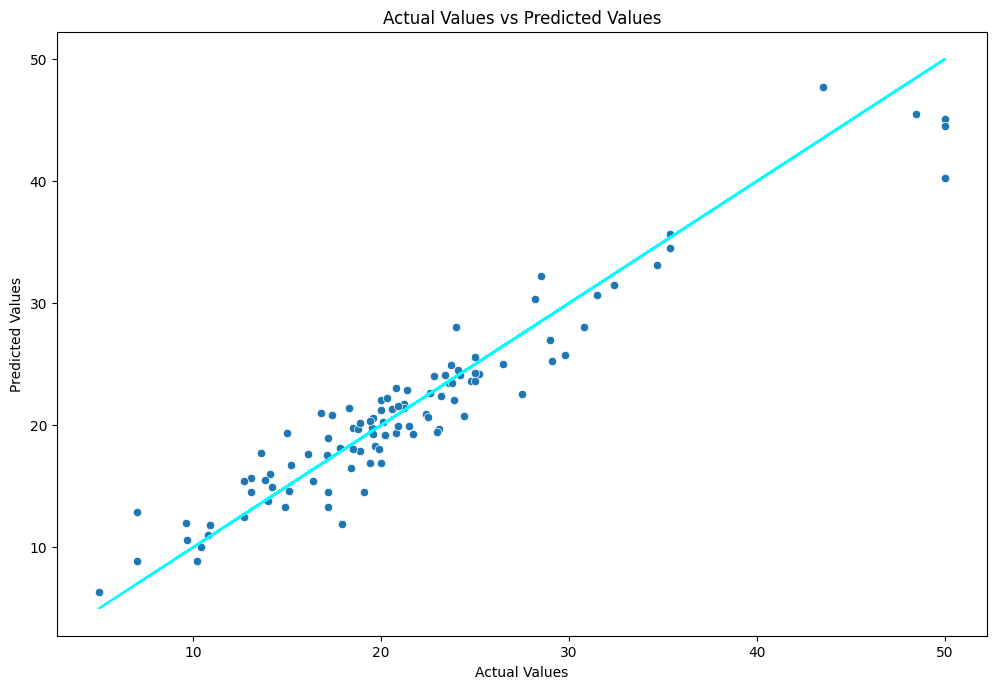

In [82]:
plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(x=y_test,y=y_preds,)
plt.plot(y_test, y_test, color='cyan')
plt.title("Actual Values vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

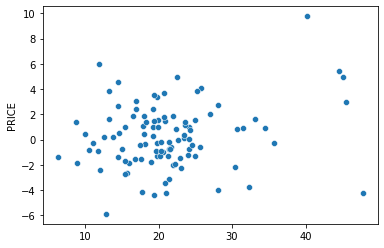

In [77]:
sns.scatterplot(x=y_preds,y=residuals)

Why do we want to look at the residuals? We want to check that they look random. Why? The residuals represent the errors of our model. If there's a pattern in our errors, then our model has a systematic bias.

We can analyse the distribution of the residuals. In particular, we're interested in the **skew** and the **mean**.

In an ideal case, what we want is something close to a normal distribution. A normal distribution has a skewness of 0 and a mean of 0. A skew of 0 means that the distribution is symmetrical - the bell curve is not lopsided or biased to one side. Here's what a normal distribution looks like: 



<Figure size 864x288 with 0 Axes>

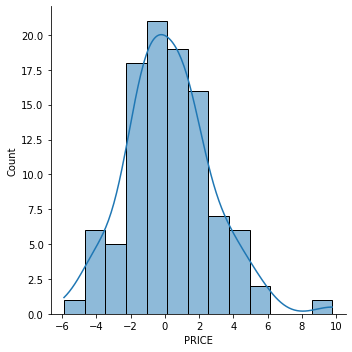

In [73]:
%matplotlib inline
plt.figure(figsize=(12,4))
sns.displot(residuals,kde=True)

# Predict a Property's Value using the Regression Coefficients

The average property has the mean value for all its charactistics:

In [57]:
# Starting Point: Average Values in the Dataset
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65


In [84]:
predicted_price = regr.predict(property_stats)
property_stats["PRICE"] = predicted_price
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.60


Now we've predicted the house price for all the average features 



Keeping the average values for CRIM, RAD, INDUS and others, value a property with the following characteristics:

In [88]:
# Define Property Characteristics
next_to_river = 1.00
nr_rooms = 8
students_per_classroom = 20 
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low
property_stats = property_stats.drop("PRICE",axis=1)
property_stats["CHAS"] = next_to_river
property_stats["RM"] = nr_rooms
property_stats["PTRATIO"] = students_per_classroom
property_stats["NOX"] = pollution
property_stats["LSTAT"] = amount_of_poverty
predicted_price = regr.predict(property_stats)
property_stats["PRICE"] = predicted_price
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,3.61,11.36,11.14,1.00,0.62,8,68.57,3.80,9.55,408.24,20,356.67,6.95,33.88


# Feature Importance

Now that we've successfully predicted the price, we should see which features contributed the most in the model's prediction

In [89]:
regr.feature_importances_

array([2.29112623e-02, 6.73107515e-04, 4.47353651e-03, 1.94497091e-04,
       3.04375003e-02, 4.17365552e-01, 1.52805363e-02, 7.46552998e-02,
       2.02678263e-03, 1.36557464e-02, 3.14053486e-02, 1.23461848e-02,
       3.74574646e-01])

In [94]:
def plot_features(columns,importances,n=20):
  df = (pd.DataFrame({"features":columns,"feature_importances":importances}).sort_values("feature_importances",ascending=False).reset_index(drop=True))
  fig, ax = plt.subplots()
  ax.barh(df["features"][:n],df["feature_importances"][:n])
  ax.set_ylabel("features")
  ax.set_xlabel("Feature Importances")


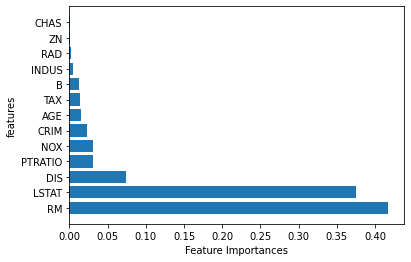

In [95]:
plot_features(X_test.columns,regr.feature_importances_)

So RM or average number of rooms per dwelling contributed the most in the prediction of the model